# Crop Production Analysis of India

## Data loading and basic info of data

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Create path varaibles
path = '/content/drive/MyDrive/Crop Production data.csv'

In [ ]:
# Import csv file as pandas dataframe
crop = pd.read_csv(path)

In [ ]:
#Print first five rows of the dataframe
crop.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [ ]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [ ]:
# Changing datatype of crop year to string
crop['Crop_Year'] = crop['Crop_Year'].astype(str)

In [ ]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  object 
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), object(5)
memory usage: 13.1+ MB


## Data Preprocessing

In [ ]:
crop.isna().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

As we can see only the production column has missing values and it is only 3730 of 246091 rows ie. 1.5 % of missing values so by dropping them we don't lose a significant amount of data.

In [ ]:
#dropping missing values
crop = crop.dropna()

In [ ]:
crop.isna().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [ ]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242361 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     242361 non-null  object 
 1   District_Name  242361 non-null  object 
 2   Crop_Year      242361 non-null  object 
 3   Season         242361 non-null  object 
 4   Crop           242361 non-null  object 
 5   Area           242361 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), object(5)
memory usage: 14.8+ MB


In [ ]:
# Taking the dataframe as csv file
#crop.to_csv('crop_production_preprocessed.csv', index=True)

Now that the data is clean we move on to the next part i.e Exploratory Data analysis

## Exploratory Data Analysis (EDA)

We Explore the data to find out the hidden patterns in a data set

In [ ]:
# Get a list of numercial and categorical variables
num_cols = crop.select_dtypes(include=['int', 'float']).columns.tolist()
cat_cols = crop.select_dtypes(include=['object']).columns.tolist()
print("Numeric variables:", num_cols )
print("Categorical variables:", cat_cols)

Numeric variables: ['Area', 'Production']
Categorical variables: ['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop']


### Categorical Variables

We explore the number of categories in each columns

In [ ]:
for column in crop[cat_cols]:
  num_categories = crop[column].nunique()
  print(f"Number of categories in {column}: {num_categories}")

Number of categories in State_Name: 33
Number of categories in District_Name: 646
Number of categories in Crop_Year: 19
Number of categories in Season: 6
Number of categories in Crop: 124


In [ ]:
crop['State_Name'].value_counts()

State_Name
Uttar Pradesh                  33189
Madhya Pradesh                 22604
Karnataka                      21079
Bihar                          18874
Assam                          14622
Odisha                         13524
Tamil Nadu                     13266
Maharashtra                    12496
Rajasthan                      12066
Chhattisgarh                   10368
West Bengal                     9597
Andhra Pradesh                  9561
Gujarat                         8365
Telangana                       5591
Uttarakhand                     4825
Haryana                         4540
Kerala                          4003
Nagaland                        3904
Punjab                          3143
Meghalaya                       2867
Arunachal Pradesh               2545
Himachal Pradesh                2456
Jammu and Kashmir               1632
Tripura                         1412
Manipur                         1266
Jharkhand                       1266
Mizoram                    

In [ ]:
crop['Crop_Year'].value_counts()

Crop_Year
2003    17139
2002    16536
2007    14269
2008    14230
2006    13976
2004    13858
2010    13793
2011    13791
2009    13767
2000    13553
2005    13519
2013    13475
2001    13293
2012    13184
1999    12441
1998    11262
2014    10815
1997     8899
2015      561
Name: count, dtype: int64

In [ ]:
crop['Season'].value_counts()

Season
Kharif         94283
Rabi           66160
Whole Year     56127
Summer         14811
Winter          6050
Autumn          4930
Name: count, dtype: int64

### Numerical Variables

<Axes: xlabel='Area', ylabel='Production'>

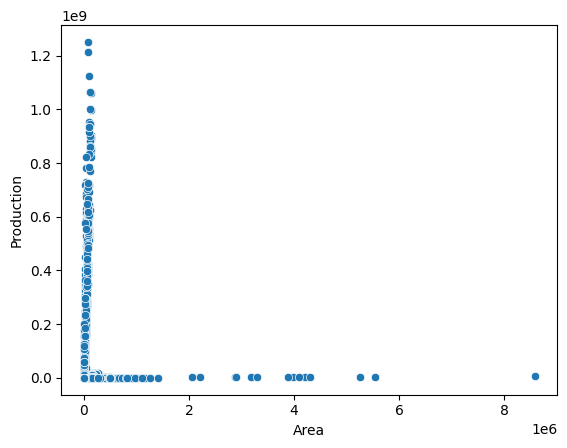

In [ ]:
sns.scatterplot(crop[num_cols], x = 'Area', y = 'Production')

From the scatter plot we can see that there is no clear relation between Area and the production quantity, so we also confirm this with the correlation coefficient in the below cell

<Axes: >

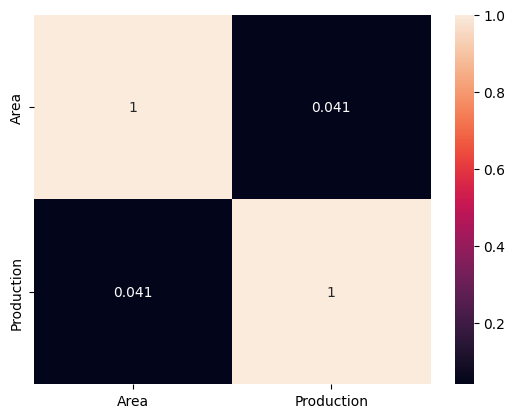

In [ ]:
sns.heatmap(crop[num_cols].corr(), annot = True)

### EDA power BI dashboard and Insights

The Rest of the EDA is done in power BI. The dashboard link us given below.


[Crop production EDA Power BI Dashboard](https://app.powerbi.com/view?r=eyJrIjoiYTk1N2Q3NmQtM2QzMy00Y2QyLWEyMTEtZjE4ZTY1ZTdkNWYxIiwidCI6ImM2ZTU0OWIzLTVmNDUtNDAzMi1hYWU5LWQ0MjQ0ZGM1YjJjNCJ9&pageName=ReportSection)


**INSIGHTS FROM EDA**

**Explanation of pages in power BI dashboard**

The power BI dashboard has 4 pages and each page is titled as followed.
* Crop Production
* Crop Production when top two crops are removed
* Crop Production area
* Crop produdction area when top crop is removed

The pages ***Crop production*** and ***Crop Production when top two crops are removed***  has the following visuals

* Crop production by type of crop
* Crop production by year
* Crop production by State
* Crop production by District
* Crop production by Season

All the visuals except the year visual are set such that only the top 5 values are displayed.

The only difference between the two pages of report are that in the second page the top two crops are filtered out from the visual. When we observe the visuals in the first page it is obvious that the top two crops that is **coconut** and **sugar cane** occupy the major value of the charts and the results are skewed towards that. So it is important to visualize the results of other crops.

Filters of all the categories are given at the top of each page in order to visualize the data in our required formats.

The pages ***Crop Production area*** and ***Crop production area when top crop is removed***  has the following visuals

* Crop production area by type of crop
* Crop production area by year
* Crop production area by State
* Crop production area by District
* Production per area by crop

In the above production per area is a new measure created and it is a ratio of production to the area that the crop has been produced

**Findings**
1. We find that the coconut and sugarcane occupy the top two spots for the production of crop in India
2. Whole year crops are produced more than seasonal crops.
3. Kerala State produces the highest crops compared to any other state
4. When top two crops are removed then rice becomes the highest produced crop in India
5. When top two crops are removed then Uttar Pradesh becomes the state that produces the highest crops.
6. Rabi season crops are produced more than other seasonal crops when top two crops are removed
7. There is a variability in the crop production area throughout the years 1997 to 2015.
8. The production per area of coconut is the highest among all crops.






## Feature Engineering

The next step after EDA is feature engineering. This is a process of identifying the variables that are necessary for the for the machine learning process. The variable we are trying to predict is crop production. In this section we would explore how other variables relate to crop production

As we have already seen in the numerical variables section of EDA. There is  not much correlation between area and production of the crop when taken as whole but I would like to explore what happens when correlation is checked when the correlation is checked on a particular categorical basis

In [ ]:
def calculate_correlation(df, category_column, x_column = 'Area' , y_column = 'Production'):
    unique_categories = df[category_column].unique()
    correlation_coefficients = {}
    for category in unique_categories:
        subset = df[df[category_column] == category]
        correlation_coefficients[category] = subset[x_column].corr(subset[y_column])
    return correlation_coefficients
calculate_correlation(crop, 'Crop')


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


{'Arecanut': 0.7849459721264063,
 'Other Kharif pulses': 0.8646652406417975,
 'Rice': 0.8695453972432068,
 'Banana': 0.7838332074551411,
 'Cashewnut': 0.7546929441035647,
 'Coconut ': 0.7504754673709894,
 'Dry ginger': 0.7537251355542889,
 'Sugarcane': 0.8875278279580356,
 'Sweet potato': 0.9297543282176586,
 'Tapioca': 0.9361413229614819,
 'Black pepper': 0.6895928449791888,
 'Dry chillies': 0.760879086358931,
 'other oilseeds': 0.2572649926808549,
 'Turmeric': 0.5829940788376531,
 'Maize': 0.8416577763202193,
 'Moong(Green Gram)': 0.8484865492981966,
 'Urad': 0.8774809309907452,
 'Arhar/Tur': 0.907490073235187,
 'Groundnut': 0.7930616427857377,
 'Sunflower': 0.9008097278587595,
 'Bajra': 0.7292787158169456,
 'Castor seed': 0.8153102615388425,
 'Cotton(lint)': 0.8227581390497599,
 'Horse-gram': 0.9187472806127427,
 'Jowar': 0.8552209516314384,
 'Korra': 0.9956043466964186,
 'Ragi': 0.9577235776610321,
 'Tobacco': 0.8572776796262861,
 'Gram': 0.9113401399910537,
 'Wheat': 0.92455819709

We are getting nan for some of the categories with zero division warning so we will explore the reason for that

In [ ]:
nan_correlation_count = 0
unique_crops = crop['Crop'].unique()
correlation_coefficients = {}
for crop_category in unique_crops:
    crop_subset = crop[crop['Crop'] == crop_category]
    correlation_coefficient = crop_subset['Area'].corr(crop_subset['Production'])
    if np.isnan(correlation_coefficient):
        nan_correlation_count += len(crop_subset)
        print(f"For {crop_category}: Correlation coefficient is NaN")
        print(crop_subset)
    else:
        correlation_coefficients[crop_category] = correlation_coefficient

print("Total number of rows with NaN correlation coefficients:", nan_correlation_count)

For Cucumber: Correlation coefficient is NaN
            State_Name  District_Name Crop_Year       Season      Crop  \
424     Andhra Pradesh      ANANTAPUR      2002  Whole Year   Cucumber   
481     Andhra Pradesh      ANANTAPUR      2003  Whole Year   Cucumber   
1208    Andhra Pradesh       CHITTOOR      2002  Whole Year   Cucumber   
1268    Andhra Pradesh       CHITTOOR      2003  Whole Year   Cucumber   
2003    Andhra Pradesh  EAST GODAVARI      2002  Whole Year   Cucumber   
...                ...            ...       ...          ...       ...   
195226      Telangana       NIZAMABAD      2003  Whole Year   Cucumber   
195820      Telangana      RANGAREDDI      2002  Whole Year   Cucumber   
195879      Telangana      RANGAREDDI      2003  Whole Year   Cucumber   
196474      Telangana        WARANGAL      2002  Whole Year   Cucumber   
196526      Telangana        WARANGAL      2003  Whole Year   Cucumber   

          Area  Production  
424       18.0         0.0  
481     

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


From the above results we infer that some of the production values are zero so that is the reason we are getting nan in correlation coefficient.

So we calculate the number of rows where area and production is zero separately

In [ ]:
# Count the number of rows where 'Area' is zero
num_zero_area = (crop['Area'] == 0).sum()

# Count the number of rows where 'Production' is zero
num_zero_production = (crop['Production'] == 0).sum()

# Print the number of rows where 'Area' is zero
print("Number of rows where 'Area' is zero:", num_zero_area)

# Print the number of rows where 'Production' is zero
print("Number of rows where 'Production' is zero:", num_zero_production)


Number of rows where 'Area' is zero: 0
Number of rows where 'Production' is zero: 3523


From the above results we find out that the number of zero rows in area and production column are 0 and 3523 respectively, but we are getting only 621 rows wih correlation coefficient as nan. This may be due to the reason that the other crops has correlation coefficient as zero and while aggregation it just took the mean ignoring the nan value. This also may be the reason why we have such a low overall correlation between Area and Production.

In order to proceed further it is best to drop the rows that has production value zero and contine the analysis. We have data of more that 2,00,000 rows so it wont much affect the data

In [ ]:
crop = crop[crop['Production'] != 0]

In [ ]:
(crop['Production'] == 0).sum()

0

In [ ]:
calculate_correlation(crop, 'State_Name')

{'Andaman and Nicobar Islands': 0.8586444456614066,
 'Andhra Pradesh': 0.026797712758452698,
 'Arunachal Pradesh': 0.8540117564715293,
 'Assam': 0.0006735087559219393,
 'Bihar': 0.3848649251876202,
 'Chandigarh': 0.9008307385195817,
 'Chhattisgarh': 0.8760785452654187,
 'Dadra and Nagar Haveli': 0.2663464956011671,
 'Goa': 0.1563406604934847,
 'Gujarat': 0.29072034096809796,
 'Haryana': 0.6528154326720752,
 'Himachal Pradesh': 0.922672735722267,
 'Jammu and Kashmir ': 0.920719780477944,
 'Jharkhand': 0.9275380440293414,
 'Karnataka': 0.2327748515226693,
 'Kerala': 0.8358617158211493,
 'Madhya Pradesh': 0.769420585433825,
 'Maharashtra': 0.16756280046952,
 'Manipur': 0.9612179324878122,
 'Meghalaya': 0.6840708846099509,
 'Mizoram': 0.9220618076747491,
 'Nagaland': 0.7757680922498817,
 'Odisha': 0.798715403423304,
 'Puducherry': 0.027064819564852797,
 'Punjab': 0.9044872328795844,
 'Rajasthan': 0.6278867684997463,
 'Sikkim': 0.6206117229824172,
 'Tamil Nadu': 0.05888264092588941,
 'Telan

In [ ]:
calculate_correlation(crop, 'District_Name')

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


{'NICOBARS': 0.9866679162184794,
 'NORTH AND MIDDLE ANDAMAN': 0.46147935258051853,
 'SOUTH ANDAMANS': 0.5126922621082396,
 'ANANTAPUR': 0.06261310268261545,
 'CHITTOOR': 0.00748128690006822,
 'EAST GODAVARI': 0.09961375035487252,
 'GUNTUR': 0.29862636048177565,
 'KADAPA': 0.11115645707173642,
 'KRISHNA': -0.005836653354322569,
 'KURNOOL': 0.5794159857882745,
 'PRAKASAM': 0.16415589359517643,
 'SPSR NELLORE': 0.06266777731236295,
 'SRIKAKULAM': 0.016467725537781516,
 'VISAKHAPATANAM': 0.010983770364967525,
 'VIZIANAGARAM': -0.025800349443743122,
 'WEST GODAVARI': 0.008487781243654602,
 'ANJAW': 0.9049829472251649,
 'CHANGLANG': 0.9109071203001776,
 'DIBANG VALLEY': 0.7046998195761884,
 'EAST KAMENG': 0.9572224095676042,
 'EAST SIANG': 0.8832868010270497,
 'KURUNG KUMEY': 0.9376076347145088,
 'LOHIT': 0.8512959016808274,
 'LONGDING': 0.8647345853261992,
 'LOWER DIBANG VALLEY': 0.654210868521311,
 'LOWER SUBANSIRI': 0.8828726673946754,
 'NAMSAI': nan,
 'PAPUM PARE': 0.9253153670951463,
 '

In [ ]:
calculate_correlation(crop, 'Crop_Year')

{'2000': 0.05759306900468999,
 '2001': 0.05549646943152841,
 '2002': 0.060078711398763154,
 '2003': 0.056747308913680974,
 '2004': 0.05504011998346085,
 '2005': 0.057589154877815185,
 '2006': 0.053366268073735214,
 '2010': 0.048890880969054924,
 '1997': 0.17505295978448515,
 '1998': 0.05429823816980717,
 '1999': 0.06019000037727312,
 '2007': 0.05529686323475582,
 '2008': 0.04905308315020927,
 '2009': 0.049846608441044694,
 '2011': 0.05687437358854194,
 '2012': 0.052796814663316156,
 '2013': 0.06048058560101603,
 '2014': 0.06096378453447654,
 '2015': 0.903021786140191}

In [ ]:
calculate_correlation(crop, 'Season')

{'Kharif     ': 0.278978328719908,
 'Whole Year ': 0.12155537423390905,
 'Autumn     ': 0.8723613986223315,
 'Rabi       ': 0.6832924173572991,
 'Summer     ': 0.7405505031895169,
 'Winter     ': 0.8970083290479142}

Seeing this we can see most of the moat of the data are positively correlated and we can use these all features in our analysis.

There are some features with less correlation coefficient and even negative. This may be due to the fact of variability within the data. We can also perform anova analysis to see the infuence of categorical variable on numeric prediction

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming 'crop' is your DataFrame containing both categorical and numeric variables
# 'Crop' is the categorical variable
# 'Production' is the numeric variable

# Perform ANOVA
model = ols(f"Production ~ C(Crop)", data=crop).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print ANOVA results
print(anova_table)

                sum_sq        df           F  PR(>F)
C(Crop)   8.554221e+18     104.0  316.561436     0.0
Residual  6.202997e+19  238733.0         NaN     NaN


In [ ]:
# Perform ANOVA
model = ols(f"Production ~ C(State_Name)", data=crop).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print ANOVA results
print(anova_table)

                     sum_sq        df           F  PR(>F)
C(State_Name)  2.473230e+18      32.0  270.982256     0.0
Residual       6.811096e+19  238805.0         NaN     NaN


In [ ]:
# Perform ANOVA
model = ols(f"Production ~ C(District_Name)", data=crop).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print ANOVA results
print(anova_table)

                        sum_sq        df          F  PR(>F)
C(District_Name)  3.764162e+18     645.0  20.803151     0.0
Residual          6.682003e+19  238192.0        NaN     NaN


In [ ]:
# Perform ANOVA
model = ols(f"Production ~ C(Crop_Year)", data=crop).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print ANOVA results
print(anova_table)

                    sum_sq        df         F   PR(>F)
C(Crop_Year)  8.243784e+15      18.0  1.549766  0.06367
Residual      7.057595e+19  238819.0       NaN      NaN


In [ ]:
# Perform ANOVA
model = ols(f"Production ~ C(Season)", data=crop).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print ANOVA results
print(anova_table)

                 sum_sq        df           F         PR(>F)
C(Season)  2.553078e+17       5.0  173.401495  8.009777e-185
Residual   7.032889e+19  238832.0         NaN            NaN


So from the above results we can see that all the categorical variables significantly influence the production variables, so we would be using all in our machine learning model. Before using in machine learning model we would check the outliers of the data

In [ ]:
np.max(crop['Production'])

1250800000.0

In [ ]:
np.min(crop['Production'])

0.01

In [ ]:
np.mean(crop['Production'])

591095.7082515763

In [ ]:
Q1 = crop['Production'].quantile(0.25)
Q3 = crop['Production'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = crop[(crop['Production'] < lower_bound) | (crop['Production'] > upper_bound)]

print("Outliers:")
print("Number of rows of Outliers is ", len(outliers))

Outliers:
Number of rows of Outliers is  41632


In [ ]:
Q1 = crop['Area'].quantile(0.25)
Q3 = crop['Area'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = crop[(crop['Area'] < lower_bound) | (crop['Area'] > upper_bound)]

print("Outliers:")
print("Number of rows of Outliers is ", len(outliers))

Outliers:
Number of rows of Outliers is  39233


We have used the above to identify the number of outliers of each variables. While building the model we are going to use a comparative study of model prediction using the data with outliers and the data with no outliers

In [ ]:
# Calculate quartiles and IQR for both variables
Q1_production = crop['Production'].quantile(0.25)
Q3_production = crop['Production'].quantile(0.75)
IQR_production = Q3_production - Q1_production

Q1_area = crop['Area'].quantile(0.25)
Q3_area = crop['Area'].quantile(0.75)
IQR_area = Q3_area - Q1_area

# Define outlier bounds for both variables
lower_bound_production = Q1_production - 1.5 * IQR_production
upper_bound_production = Q3_production + 1.5 * IQR_production

lower_bound_area = Q1_area - 1.5 * IQR_area
upper_bound_area = Q3_area + 1.5 * IQR_area

# Identify outliers for both variables
outliers = crop[
    (crop['Production'] < lower_bound_production) | (crop['Production'] > upper_bound_production) |
    (crop['Area'] < lower_bound_area) | (crop['Area'] > upper_bound_area)
]

#print("Outliers:")
print("Number of rows of outliers:", len(outliers))

# Remove outliers from both variables
crop_no_outliers = crop[
    (crop['Production'] >= lower_bound_production) & (crop['Production'] <= upper_bound_production) &
    (crop['Area'] >= lower_bound_area) & (crop['Area'] <= upper_bound_area)
]

#print("Dataset without outliers:")
#print(crop_no_outliers)

print("Number of rows after removing outliers:", len(crop_no_outliers))


Number of rows of outliers: 50784
Number of rows after removing outliers: 188054


In [ ]:
crop_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188054 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     188054 non-null  object 
 1   District_Name  188054 non-null  object 
 2   Crop_Year      188054 non-null  object 
 3   Season         188054 non-null  object 
 4   Crop           188054 non-null  object 
 5   Area           188054 non-null  float64
 6   Production     188054 non-null  float64
dtypes: float64(2), object(5)
memory usage: 11.5+ MB


In [ ]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238838 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     238838 non-null  object 
 1   District_Name  238838 non-null  object 
 2   Crop_Year      238838 non-null  object 
 3   Season         238838 non-null  object 
 4   Crop           238838 non-null  object 
 5   Area           238838 non-null  float64
 6   Production     238838 non-null  float64
dtypes: float64(2), object(5)
memory usage: 14.6+ MB


## Machine Learning model

### Data with outliers

In [ ]:
X = crop.drop(['Production'], axis = 'columns')
y = crop['Production']

**Note: The below pip install code must be run once and then the runtime has to be reset in order for the libraries to install properly and then while excecuting the code the pip install need not to be run again, this installs cuml and cudf libraries for high performance GPU processing**

In [ ]:
! pip install \
    --extra-index-url=https://pypi.nvidia.com \
    cudf-cu12==24.2.* dask-cudf-cu12==24.2.* cuml-cu12==24.2.* \
    cugraph-cu12==24.2.* cuspatial-cu12==24.2.* cuproj-cu12==24.2.* \
    cuxfilter-cu12==24.2.* cucim-cu12==24.2.* pylibraft-cu12==24.2.* \
    raft-dask-cu12==24.2.*

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 464.7/464.7 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 GB 612.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 GB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 917.6/917.6 kB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 98.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.0/647.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.9/162.9 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!nvidia-smi ## To show the GPU available

Fri Apr 12 19:29:20 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import cuml

In [ ]:
one_hot_encoded_vars = []
for column in cat_cols:  # Add all categorical variables here
    one_hot_encoded_var = pd.get_dummies(X[column], prefix=column)
    one_hot_encoded_vars.append(one_hot_encoded_var)

# Concatenate the one-hot encoded columns with the original DataFrame
X = pd.concat([X] + one_hot_encoded_vars, axis=1)

# Drop the original categorical variables (optional)
X.drop(cat_cols, axis=1, inplace=True)  # Add all categorical variables here

# Print the resulting DataFrame
print(X)


            Area  State_Name_Andaman and Nicobar Islands  \
0         1254.0                                       1   
1            2.0                                       1   
2          102.0                                       1   
3          176.0                                       1   
4          720.0                                       1   
...          ...                                     ...   
246086     306.0                                       0   
246087     627.0                                       0   
246088     324.0                                       0   
246089  279151.0                                       0   
246090     175.0                                       0   

        State_Name_Andhra Pradesh  State_Name_Arunachal Pradesh  \
0                               0                             0   
1                               0                             0   
2                               0                             0   
3          

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import cudf

In [ ]:
X_train_cu = cudf.DataFrame.from_pandas(X_train)
X_test_cu = cudf.DataFrame.from_pandas(X_test)
y_train_cu = cudf.Series.from_pandas(y_train)
y_test_cu = cudf.Series.from_pandas(y_test)

In [ ]:
from cuml.metrics.regression import mean_absolute_error, mean_squared_error, r2_score
from cuml.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


# Train the linear regression model
model = LinearRegression()
model.fit(X_train_cu, y_train_cu)

# Predict on the testing set
y_pred = model.predict(X_test_cu)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test_cu, y_pred)
rmse = mean_squared_error(y_test_cu, y_pred, squared=False)
r2 = r2_score(y_test_cu, y_pred)

# Print the evaluation metrics
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 23.08, the new 'copy_X' parameter defaults to 'True', ensuring a copy of X is created after passing it to fit(), preventing any changes to the input, but with increased memory usage. This represents a change in behavior from previous versions. With `copy_X=False` a copy might still be created if necessary. Explicitly set 'copy_X' to either True or False to suppress this warning.
  return init_func(self, *args, **filtered_kwargs)


MAE: 2462638.387073647
RMSE: 17469573.02865728
R2: 0.1924140504799341


In [ ]:
import cuml
from cuml.metrics.regression import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from cuml.ensemble import RandomForestRegressor
from cuml import ForestInference


# Random Forest
print("\nRandom Forest:")
rf_model = RandomForestRegressor()
rf_model.fit(X_train_cu, y_train_cu)
y_pred_rf = rf_model.predict(X_test_cu)
mae_rf = mean_absolute_error(y_test_cu, y_pred_rf)
rmse_rf = mean_squared_error(y_test_cu, y_pred_rf, squared=False)
r2_rf = r2_score(y_test_cu, y_pred_rf)
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("R2:", r2_rf)

# XGBoost
print("\nXGBoost:")
xgb_model = XGBRegressor(device ='cuda')
xgb_model.fit(X_train_cu, y_train_cu)
y_pred_xgb = xgb_model.predict(X_test_cu)
mae_xgb = mean_absolute_error(y_test_cu, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test_cu, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test_cu, y_pred_xgb)
print("MAE:", mae_xgb)
print("RMSE:", rmse_xgb)
print("R2:", r2_xgb)



Random Forest:


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


MAE: 130558.83389439002
RMSE: 3735806.9001649953
R2: 0.9630688345451629

XGBoost:
MAE: 156856.97262869496
RMSE: 4521809.198226377
R2: 0.9458935999621992


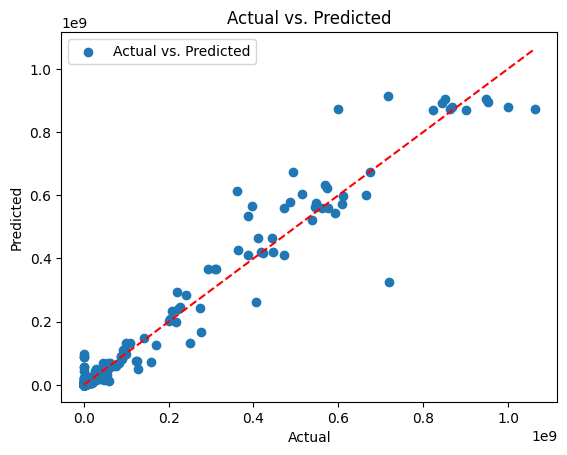

In [ ]:
# Plotting Actual vs predicted for random forest model
y_test_pd = y_test_cu.to_pandas()
y_pred_pd = y_pred_rf.to_pandas()
plt.scatter(y_test_pd, y_pred_pd, label='Actual vs. Predicted')
plt.plot([min(y_test_pd), max(y_test_pd)], [min(y_test_pd), max(y_test_pd)], '--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

### Data without outliers

In [ ]:
X = crop_no_outliers.drop(['Production'], axis = 'columns')
y = crop_no_outliers['Production']

In [ ]:
one_hot_encoded_vars = []
for column in cat_cols:  # Add all categorical variables here
    one_hot_encoded_var = pd.get_dummies(X[column], prefix=column)
    one_hot_encoded_vars.append(one_hot_encoded_var)

# Concatenate the one-hot encoded columns with the original DataFrame
X = pd.concat([X] + one_hot_encoded_vars, axis=1)

# Drop the original categorical variables (optional)
X.drop(cat_cols, axis=1, inplace=True)  # Add all categorical variables here

# Print the resulting DataFrame
print(X)

          Area  State_Name_Andaman and Nicobar Islands  \
0       1254.0                                       1   
1          2.0                                       1   
2        102.0                                       1   
3        176.0                                       1   
4        720.0                                       1   
...        ...                                     ...   
246085   325.0                                       0   
246086   306.0                                       0   
246087   627.0                                       0   
246088   324.0                                       0   
246090   175.0                                       0   

        State_Name_Andhra Pradesh  State_Name_Arunachal Pradesh  \
0                               0                             0   
1                               0                             0   
2                               0                             0   
3                               0  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train_cu = cudf.DataFrame.from_pandas(X_train)
X_test_cu = cudf.DataFrame.from_pandas(X_test)
y_train_cu = cudf.Series.from_pandas(y_train)
y_test_cu = cudf.Series.from_pandas(y_test)

In [ ]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train_cu, y_train_cu)

# Predict on the testing set
y_pred = model.predict(X_test_cu)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test_cu, y_pred)
rmse = mean_squared_error(y_test_cu, y_pred, squared=False)
r2 = r2_score(y_test_cu, y_pred)

# Print the evaluation metrics
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 23.08, the new 'copy_X' parameter defaults to 'True', ensuring a copy of X is created after passing it to fit(), preventing any changes to the input, but with increased memory usage. This represents a change in behavior from previous versions. With `copy_X=False` a copy might still be created if necessary. Explicitly set 'copy_X' to either True or False to suppress this warning.
  return init_func(self, *args, **filtered_kwargs)


MAE: 1178.0066999220955
RMSE: 1999.993713893787
R2: 0.5614125756144543


In [ ]:
# Random Forest
print("\nRandom Forest:")
rf_model = RandomForestRegressor()
rf_model.fit(X_train_cu, y_train_cu)
y_pred_rf = rf_model.predict(X_test_cu)
mae_rf = mean_absolute_error(y_test_cu, y_pred_rf)
rmse_rf = mean_squared_error(y_test_cu, y_pred_rf, squared=False)
r2_rf = r2_score(y_test_cu, y_pred_rf)
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("R2:", r2_rf)

# XGBoost
print("\nXGBoost:")
xgb_model = XGBRegressor(device ='cuda')
xgb_model.fit(X_train_cu, y_train_cu)
y_pred_xgb = xgb_model.predict(X_test_cu)
mae_xgb = mean_absolute_error(y_test_cu, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test_cu, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test_cu, y_pred_xgb)
print("MAE:", mae_xgb)
print("RMSE:", rmse_xgb)
print("R2:", r2_xgb)


Random Forest:


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


MAE: 619.5322040191489
RMSE: 1312.6474627071107
R2: 0.8110725248937587

XGBoost:
MAE: 548.1062719382529
RMSE: 1175.8832729226544
R2: 0.848390177691921


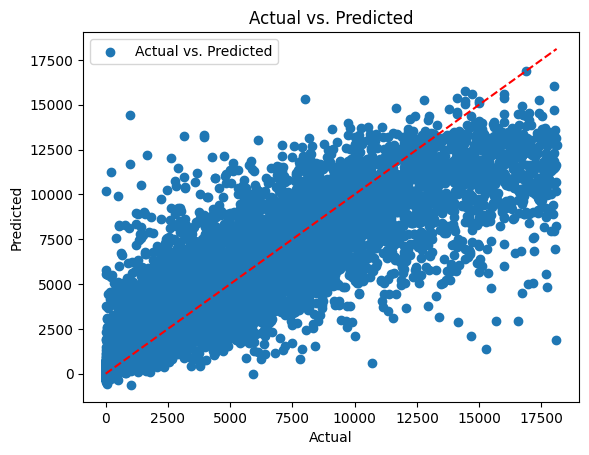

In [ ]:
# Plotting Actual vs predicted for xgboost model
y_test_pd = y_test_cu.to_pandas()
plt.scatter(y_test_pd, y_pred_xgb, label='Actual vs. Predicted')
plt.plot([min(y_test_pd), max(y_test_pd)], [min(y_test_pd), max(y_test_pd)], '--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()